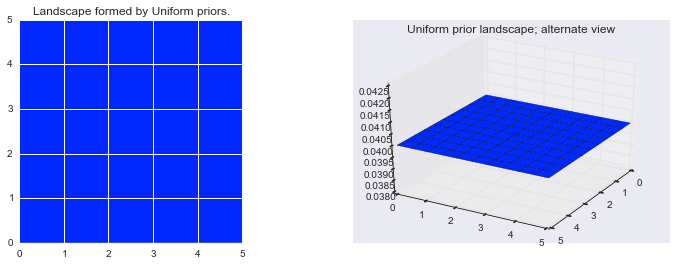

In [1]:
#MCMC = Markov Chain Monte Carlo

%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors.")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
plt.title("Uniform prior landscape; alternate view");

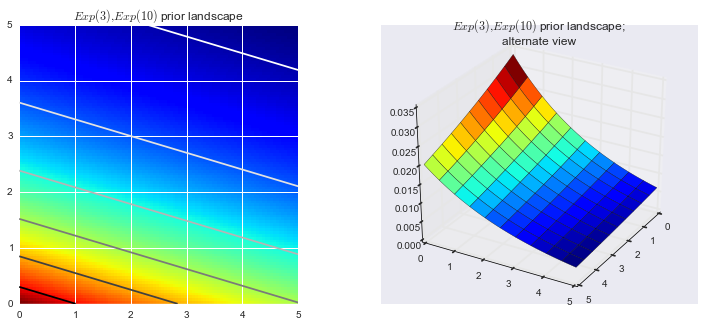

In [3]:
figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Exp(3), Exp(10)$ prior landscape")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet)
ax.view_init(azim=390)
plt.title("$Exp(3), Exp(10)$ prior landscape; \nalternate view")


In [2]:
#As the value of N increases the bullseye gets more and more concentrated
N = 5

lambda_1_true = 1
lambda_2_true = 3

data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)
print "observed (2-dimensional,sample size = %d):" % N, data

# plotting details.
x = y = np.linspace(.01, 5, 100)
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x)
                        for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y)
                        for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

observed (2-dimensional,sample size = 5): [[1 4]
 [1 5]
 [1 2]
 [0 2]
 [0 2]]


(0, 5)

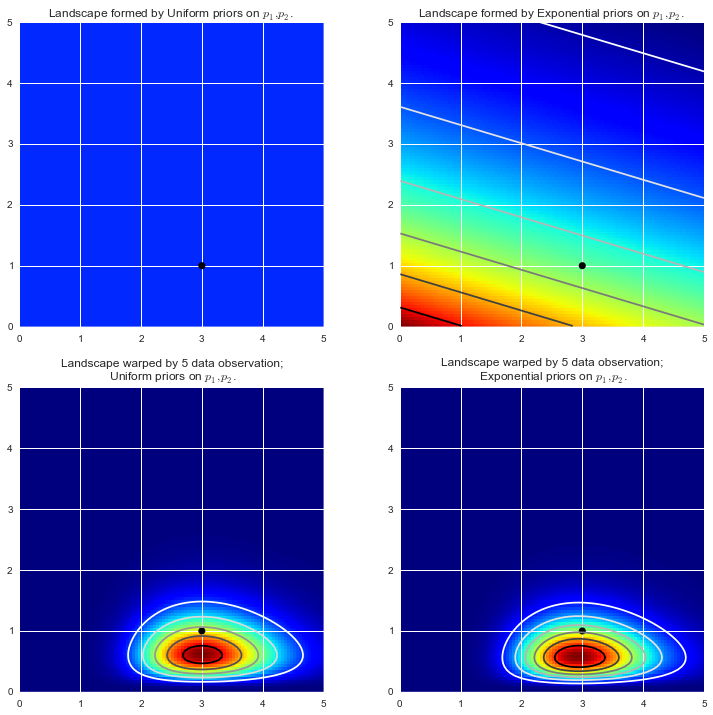

In [4]:
#Lets plot our different surfacs to help build intuition of the
#interaction between these prior/posterior distributions

figsize(12.5, 12)
# matplotlib heavy lifting below, beware!
plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(x, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors on $p_1, p_2$.")

plt.subplot(223)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.title("Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$." % N)
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.subplot(222)
exp_x = stats.expon.pdf(x, loc=0, scale=3)
exp_y = stats.expon.pdf(x, loc=0, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])

plt.contour(x, y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Exponential priors on $p_1, p_2$.")

plt.subplot(224)
# This is the likelihood times prior, that results in the posterior.
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))

plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.title("Landscape warped by %d data observation;\n Exponential priors on \
$p_1, p_2$." % N)
plt.xlim(0, 5)
plt.ylim(0, 5)


[ 115.85679142  152.26153716  178.87449059  162.93500815  107.02820697
  105.19141146  118.38288501  125.3769803   102.88054011  206.71326136] ...


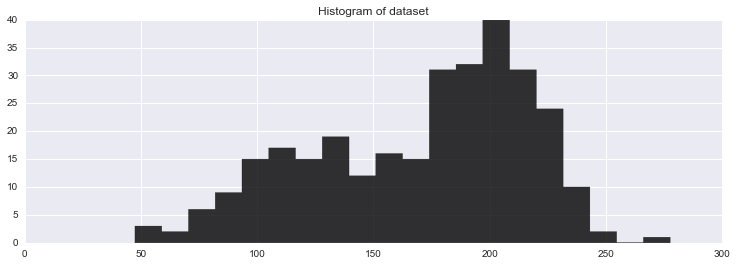

In [6]:
#Unsupervised Clustering using a Mixture Model

figsize(12.5,4)

data = np.loadtxt("data/mixture_data.csv", delimiter=',')

plt.hist(data, bins=20, color='k', histtype="stepfilled", alpha=0.8)
plt.title("Histogram of dataset")

plt.ylim([0,None])
print data[:10], '...'

In [17]:
#What does the above data look like?
#It could be said there are two peaks, that it is bimodal
#We can run some simulations to model how the data was generated

# 1.For each data point, choose cluster 1 with probability p, else choose cluster 2
# 2.Draw a random variate from a Normal distribution with parameters Mu and sigma for each cluster 
# 3.Repeat

#with the above algorithm, two datasets would cluster around the means of the proposed values 
#within a variance that would generate teh types of peaks we see in the image

import pymc as pm

#p will be the probability that a data point 
#is assigned to cluser one
#We assume it is uniform random
p = pm.Uniform("p", 0, 1)

assignment = pm.Categorical("assignment", [p, 1-p], size = data.shape[0])

print "prior assignment, with p= %.2f:" %p.value
print assignment.value[:10], '...'


prior assignment, with p= 0.31:
[1 0 1 1 0 1 1 0 1 1] ...


In [18]:
#Let's build our model
#We need some values for tau

#We do not know our standard deviation so we model them as well
#We model them as Uniform random variables between 0-100
taus = 1.0 / pm.Uniform("stds", 0, 100, size=2)**2
#The centers are eyeball factors we came up with visually from the data
centers = pm.Normal("centers", [120, 190], [0.01,0.01], size = 2)

"""
The deterministic functions below map assignments of 0 or 1 to
a set of parameters, located in the (1,2) arrays 'taus' and 'centers'
"""

@pm.deterministic
def center_i(assignment=assignment, centers=centers):
    return centers[assignment]

@pm.deterministic
def tau_i(assignment=assignment, taus=taus):
    return taus[assignment]

print "Random assignments: ", assignment.value[:5], '...'
print "Assigned center: ", center_i.value[:5], '...'
print "Assigned precision: ", tau_i.value[:5], '...'

Random assignments:  [1 0 1 1 0] ...
Assigned center:  [ 186.30673267  115.52143427  186.30673267  186.30673267  115.52143427] ...
Assigned precision:  [ 0.00154754  0.00016216  0.00154754  0.00154754  0.00016216] ...


In [19]:
#Now we need some observations for posterior probabilities
observations = pm.Normal("obs", center_i, tau_i, value=data, observed=True)

#Lets create a model so we can generate lots and lots of samples

model = pm.Model([p, assignment, observations, taus, centers])

In [20]:
mcmc = pm.MCMC(model)
mcmc.sample(50000)

 [-----------------100%-----------------] 50000 of 50000 complete in 22.0 sec

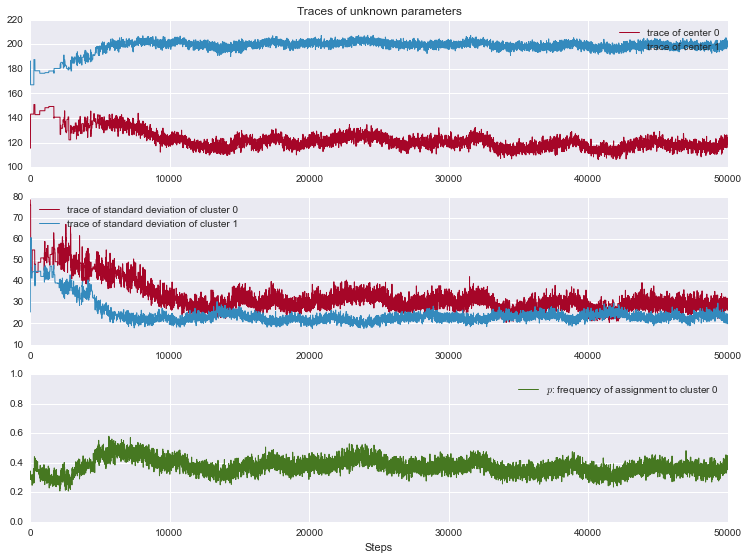

In [21]:
#The plots below are the traces or unknown parameters of the center, 
#precision, and probability of assignment to cluster

figsize(12.5, 9)
plt.subplot(311)
lw=1
center_trace = mcmc.trace("centers")[:]

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"] \
if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]

plt.plot(center_trace[:, 0], label="trace of center 0", c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label="trace of center 1", c=colors[1], lw=lw)
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)



plt.subplot(312)
std_trace = mcmc.trace("stds")[:]
plt.plot(std_trace[:, 0], label="trace of standard deviation of cluster 0",
     c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label="trace of standard deviation of cluster 1",
     c=colors[1], lw=lw)
plt.legend(loc="upper left")

plt.subplot(313)
p_trace = mcmc.trace("p")[:]
plt.plot(p_trace, label="$p$: frequency of assignment to cluster 0",
     color="#467821", lw=lw)
plt.xlabel("Steps")
plt.ylim(0, 1)
plt.legend()

In [22]:
mcmc.sample(100000)

 [-----------------100%-----------------] 100000 of 100000 complete in 47.1 sec

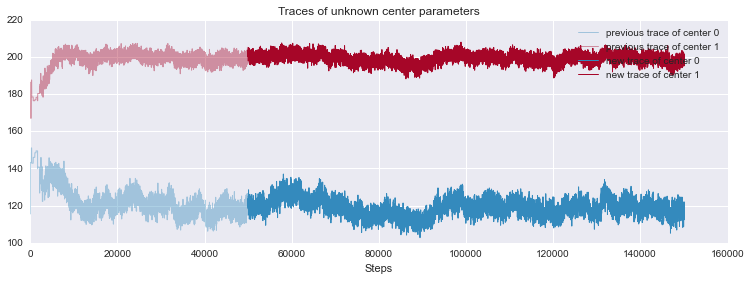

In [23]:
figsize(12.5, 4)
center_trace = mcmc.trace("centers", chain=1)[:]
prev_center_trace = mcmc.trace("centers", chain=0)[:]

x = np.arange(50000)
plt.plot(x, prev_center_trace[:, 0], label="previous trace of center 0",
     lw=lw, alpha=0.4, c=colors[1])
plt.plot(x, prev_center_trace[:, 1], label="previous trace of center 1",
     lw=lw, alpha=0.4, c=colors[0])

x = np.arange(50000, 150000)
plt.plot(x, center_trace[:, 0], label="new trace of center 0", lw=lw, c="#348ABD")
plt.plot(x, center_trace[:, 1], label="new trace of center 1", lw=lw, c="#A60628")

plt.title("Traces of unknown center parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.8)
plt.xlabel("Steps")